In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
champagne=pd.read_csv("monthly_champagne_sales.csv",index_col=0,parse_dates=[0])

In [3]:
champagne.rename(columns={'Sales':'vente'},inplace=True)

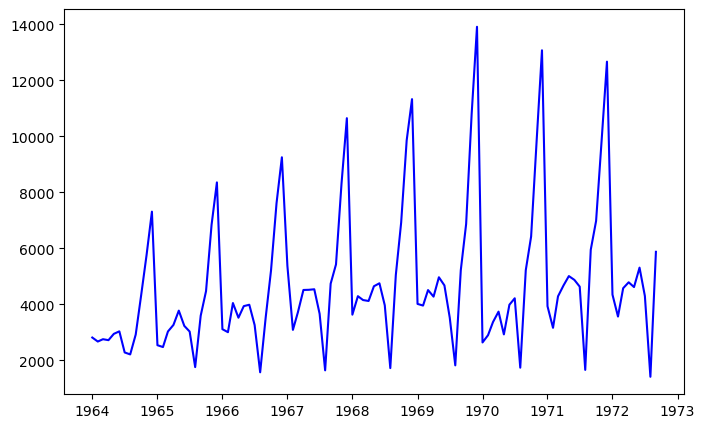

In [4]:
plt.figure(figsize=(8,5))
plt.plot(champagne,color='b')

## Calcul de la meilleur aproximation et les erreurs

In [43]:
# Liste des valeurs de alpha à tester
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.9]
n = len(champagne)
results = []

for alpha in alphas:
    somme = 0
    erreur = 0
    for j in range(1, len(champagne)):
        somme += alpha * champagne['vente'][n - j]
        a_n = ((1 - alpha) / (1 - alpha ** n)) * somme
        erreur += (alpha**j) * (champagne['vente'][n - j]-a_n)**2
    results.append({'alpha': alpha, 'a_chapeau': a_n, 'erreur': erreur})

df = pd.DataFrame(results)
print(df)

   alpha      a_chapeau        erreur
0  0.001     496.608894  3.447215e+04
1  0.005    2473.102350  1.710312e+05
2  0.010    4921.349400  3.387839e+05
3  0.050   23612.535000  1.571524e+06
4  0.100   44739.540000  2.878025e+06
5  0.300  104392.260000  6.589529e+06
6  0.500  124276.500000  1.047029e+07
7  0.900   44740.241717  2.235872e+08


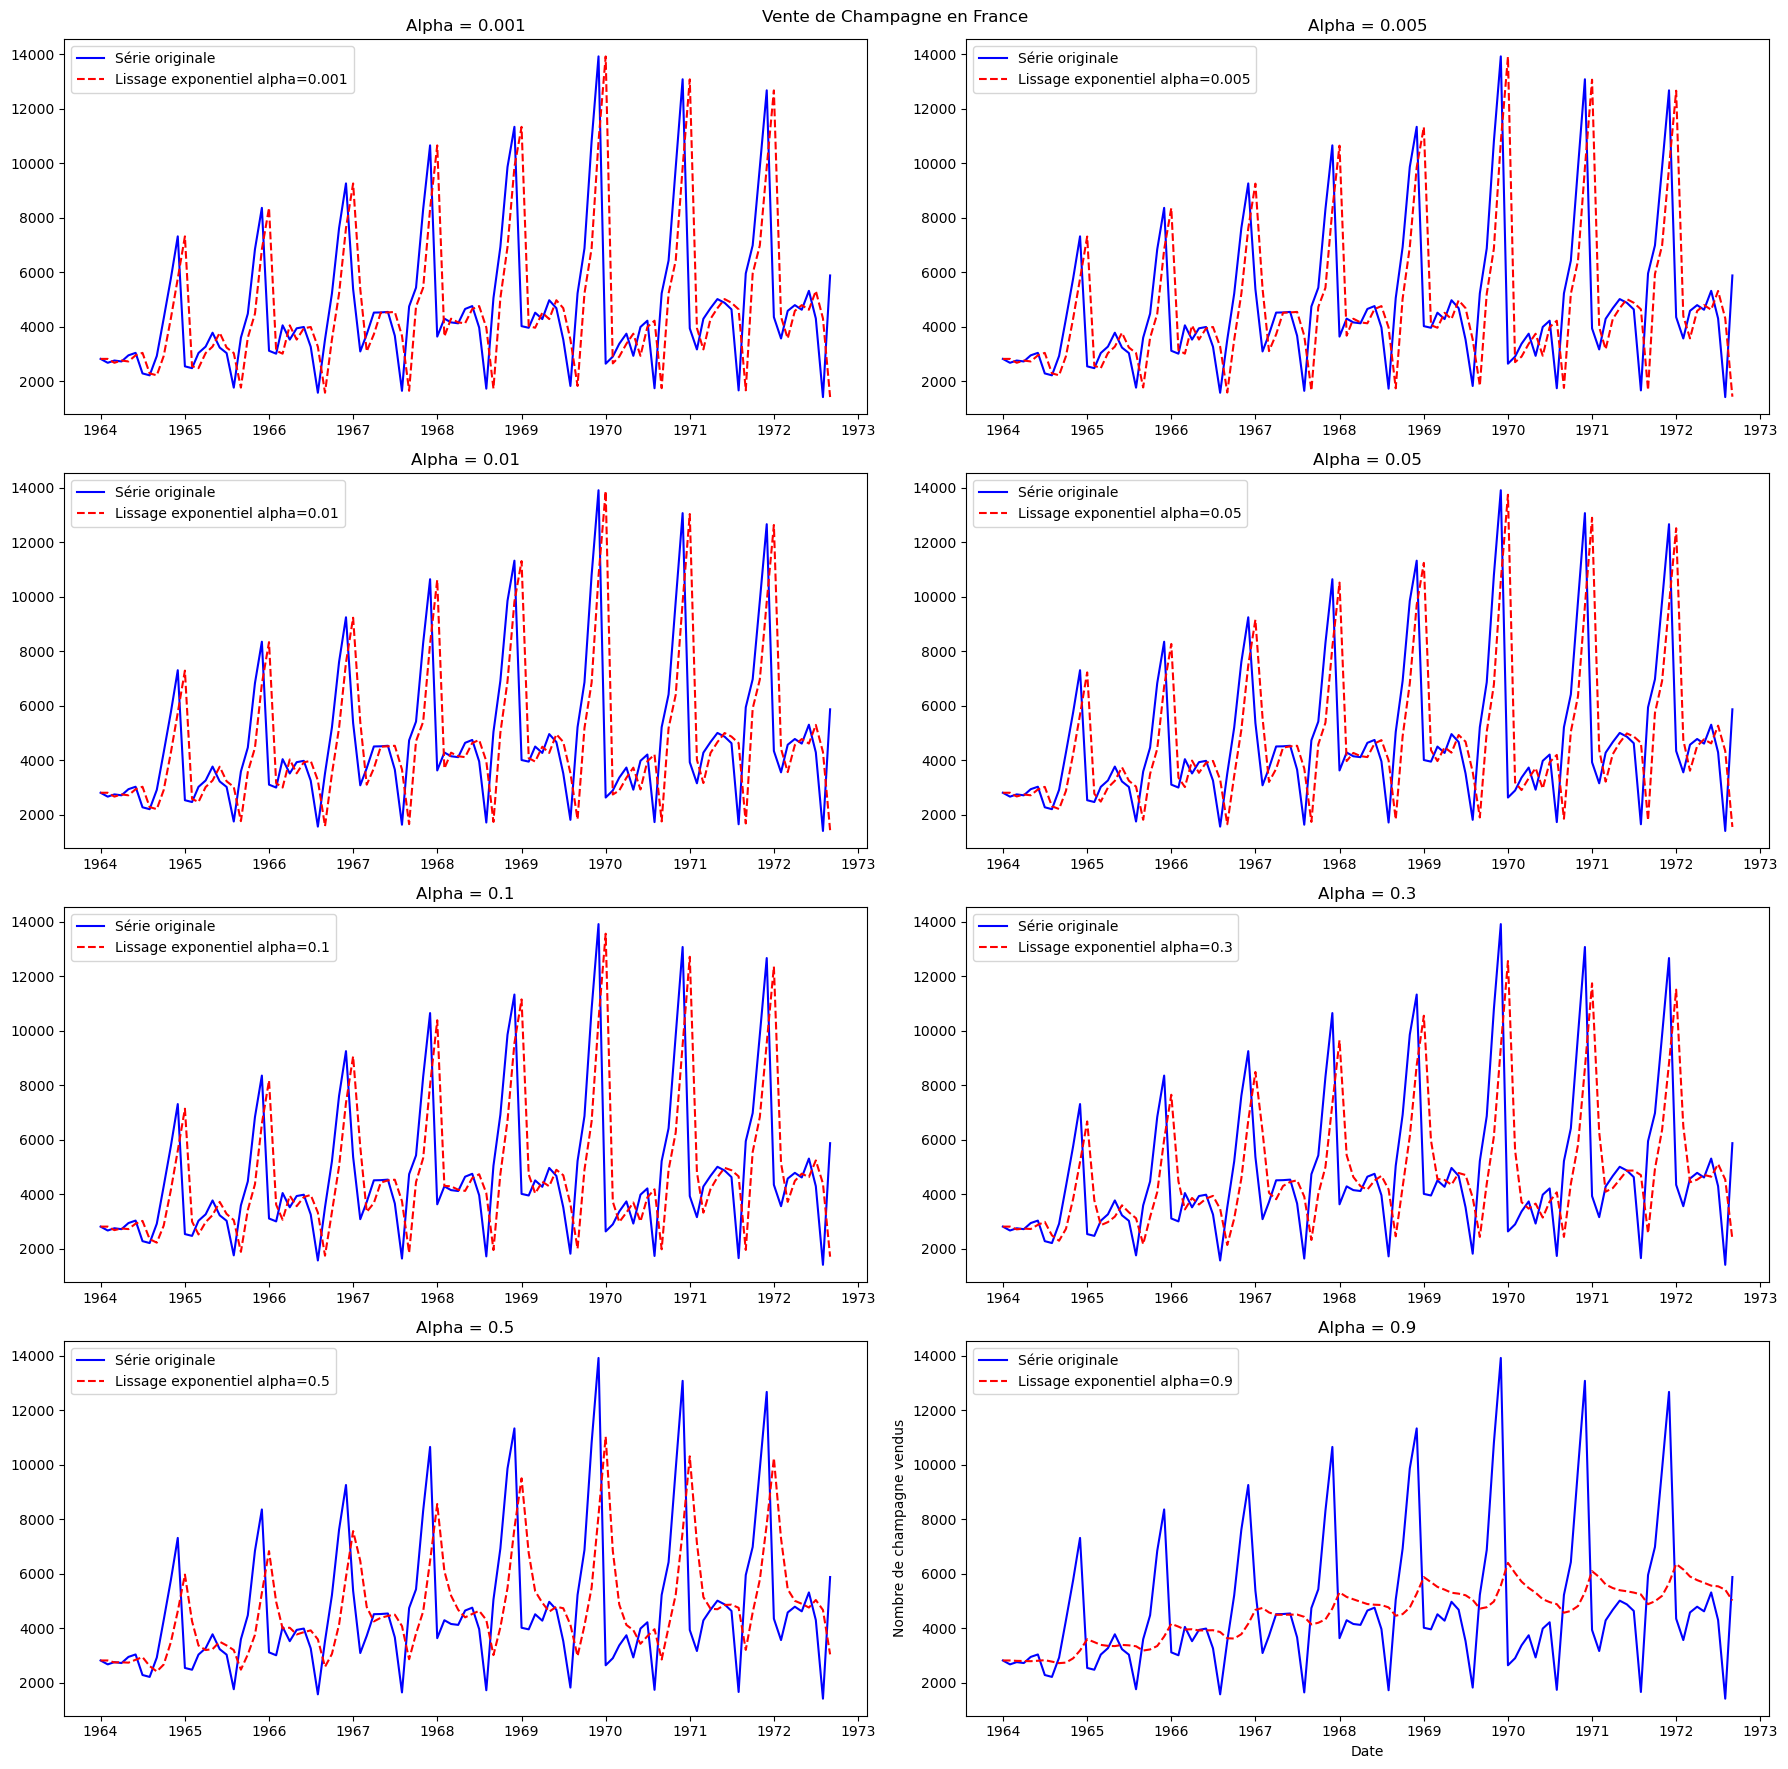

In [44]:
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.9]
champagne_copie = champagne.copy()  
fig, axs = plt.subplots(4, 2, figsize=(18, 18)) 
for i, alpha in enumerate(alphas):
    row = i // 2
    col = i % 2
    
    
    
    prevision = [0] * len(champagne)
    prevision[0] = champagne['vente'][0]
    
    for j in range(1, len(champagne)):
        prevision[j] = (1 - alpha) * champagne['vente'][j-1] + alpha * prevision[j-1]
    
    df_prevision = pd.DataFrame(prevision, index=champagne.index, columns=['Prevision'])
    
     # Calculer l'erreur au sens de moindre carré
    erreur_mc = np.square(champagne['vente'] - df_prevision['Prevision'])
    
    # Ajouter la colonne de prévision à la série copiée
    champagne_copie[f'Prevision_alpha_{alpha}'] = df_prevision
    champagne_copie[f'Erreur_alpha_{alpha}'] = erreur_mc
    
    # Afficher la série temporelle originale
    axs[row, col].plot(champagne['vente'], label='Série originale', color='b')
    
    # Afficher la prévision avec le lissage exponentiel simple
    axs[row, col].plot(df_prevision, label=f'Lissage exponentiel alpha={alpha}', color='r', linestyle='--')
    axs[row, col].set_title(f'Alpha = {alpha}')
    
    axs[row, col].legend()

plt.xlabel('Date')
plt.ylabel('Nombre de champagne vendus')
plt.suptitle('Vente de Champagne en France')
plt.tight_layout()
plt.show()

In [45]:
champagne_copie.head()

,vente,Prevision_alpha_0.001,Erreur_alpha_0.001,Prevision_alpha_0.005,Erreur_alpha_0.005,Prevision_alpha_0.01,Erreur_alpha_0.01,Prevision_alpha_0.05,Erreur_alpha_0.05,Prevision_alpha_0.1,Erreur_alpha_0.1,Prevision_alpha_0.3,Erreur_alpha_0.3,Prevision_alpha_0.5,Erreur_alpha_0.5,Prevision_alpha_0.9,Erreur_alpha_0.9
Month,,,,,,,,,,,,,,,,,
1964-01-01,2815,2815.000,0.000000,2815.000,0.000000,2815.00,0.0000,2815.00,0.0000,2815.0,0.00,2815.0,0.00,2815.0,0.00,2815.0,0.00
1964-02-01,2672,2815.000,20449.000000,2815.000,20449.000000,2815.00,20449.0000,2815.00,20449.0000,2815.0,20449.00,2815.0,20449.00,2815.0,20449.00,2815.0,20449.00
1964-03-01,2755,2672.143,6865.282449,2672.715,6770.821225,2673.43,6653.6649,2679.15,5753.2225,2686.3,4719.69,2714.9,1608.01,2743.5,132.25,2800.7,2088.49


In [17]:
# Calculer la somme des erreurs au sens de moindre carré pour chaque alpha
somme_erreurs = champagne_copie.filter(like='Erreur_alpha').sum()

# Trouver l'alpha correspondant à la plus petite somme d'erreurs
meilleur_alpha = somme_erreurs.idxmin().split('_')[-1]

# Afficher la somme des erreurs pour chaque alpha
print(somme_erreurs)

# Afficher l'alpha correspondant à la meilleure approximation
print(f"Meilleure approximation avec alpha={meilleur_alpha}")

# Conclure que cet alpha donne la meilleure approximation
print("L'alpha donnant la meilleure approximation est celui avec la plus petite somme d'erreurs au sens de moindre carré.")

Erreur_alpha_0.001    7.238070e+08
Erreur_alpha_0.005    7.232974e+08
Erreur_alpha_0.01     7.226769e+08
Erreur_alpha_0.05     7.183524e+08
Erreur_alpha_0.1      7.144343e+08
Erreur_alpha_0.3      7.112613e+08
Erreur_alpha_0.5      7.176564e+08
Erreur_alpha_0.9      6.765094e+08
dtype: float64
Meilleure approximation avec alpha=0.9
L'alpha donnant la meilleure approximation est celui avec la plus petite somme d'erreurs au sens de moindre carré.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
serie=pd.read_csv("trafic_aerien\AirPassengers.csv",index_col=0,parse_dates=[0])

In [3]:
serie.rename(columns={'#Passengers':'passagers'},inplace=True)

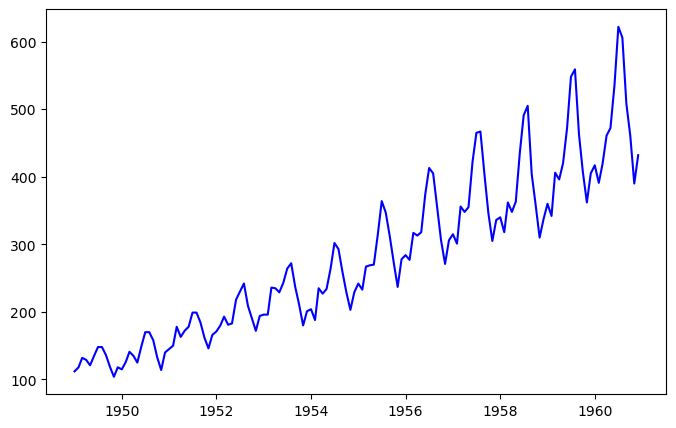

In [12]:
plt.figure(figsize=(8,5))
plt.plot(serie,color='b')

## Calcul de la meilleur aproximation et les erreurs

In [21]:
# Liste des valeurs de alpha à tester
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.9]
n = len(serie)
results = []

for alpha in alphas:
    somme = 0
    erreur = 0
    for j in range(1, len(serie)):
        somme += alpha * serie['passagers'][n - j]
        a_n = ((1 - alpha) / (1 - alpha ** n)) * somme
        erreur += (alpha**j) * (serie['passagers'][n - j]-a_n)**2
    results.append({'alpha': alpha, 'a_chapeau': a_n, 'erreur': erreur})

df = pd.DataFrame(results)
print(df)

   alpha     a_chapeau        erreur
0  0.001     40.210749  1.864030e+02
1  0.005    200.248725  9.276077e+02
2  0.010    398.484900  1.844257e+03
3  0.050   1911.922500  8.794916e+03
4  0.100   3622.590000  1.658609e+04
5  0.300   8452.710000  4.037908e+04
6  0.500  10062.750000  6.858847e+04
7  0.900   3622.590933  1.478389e+06


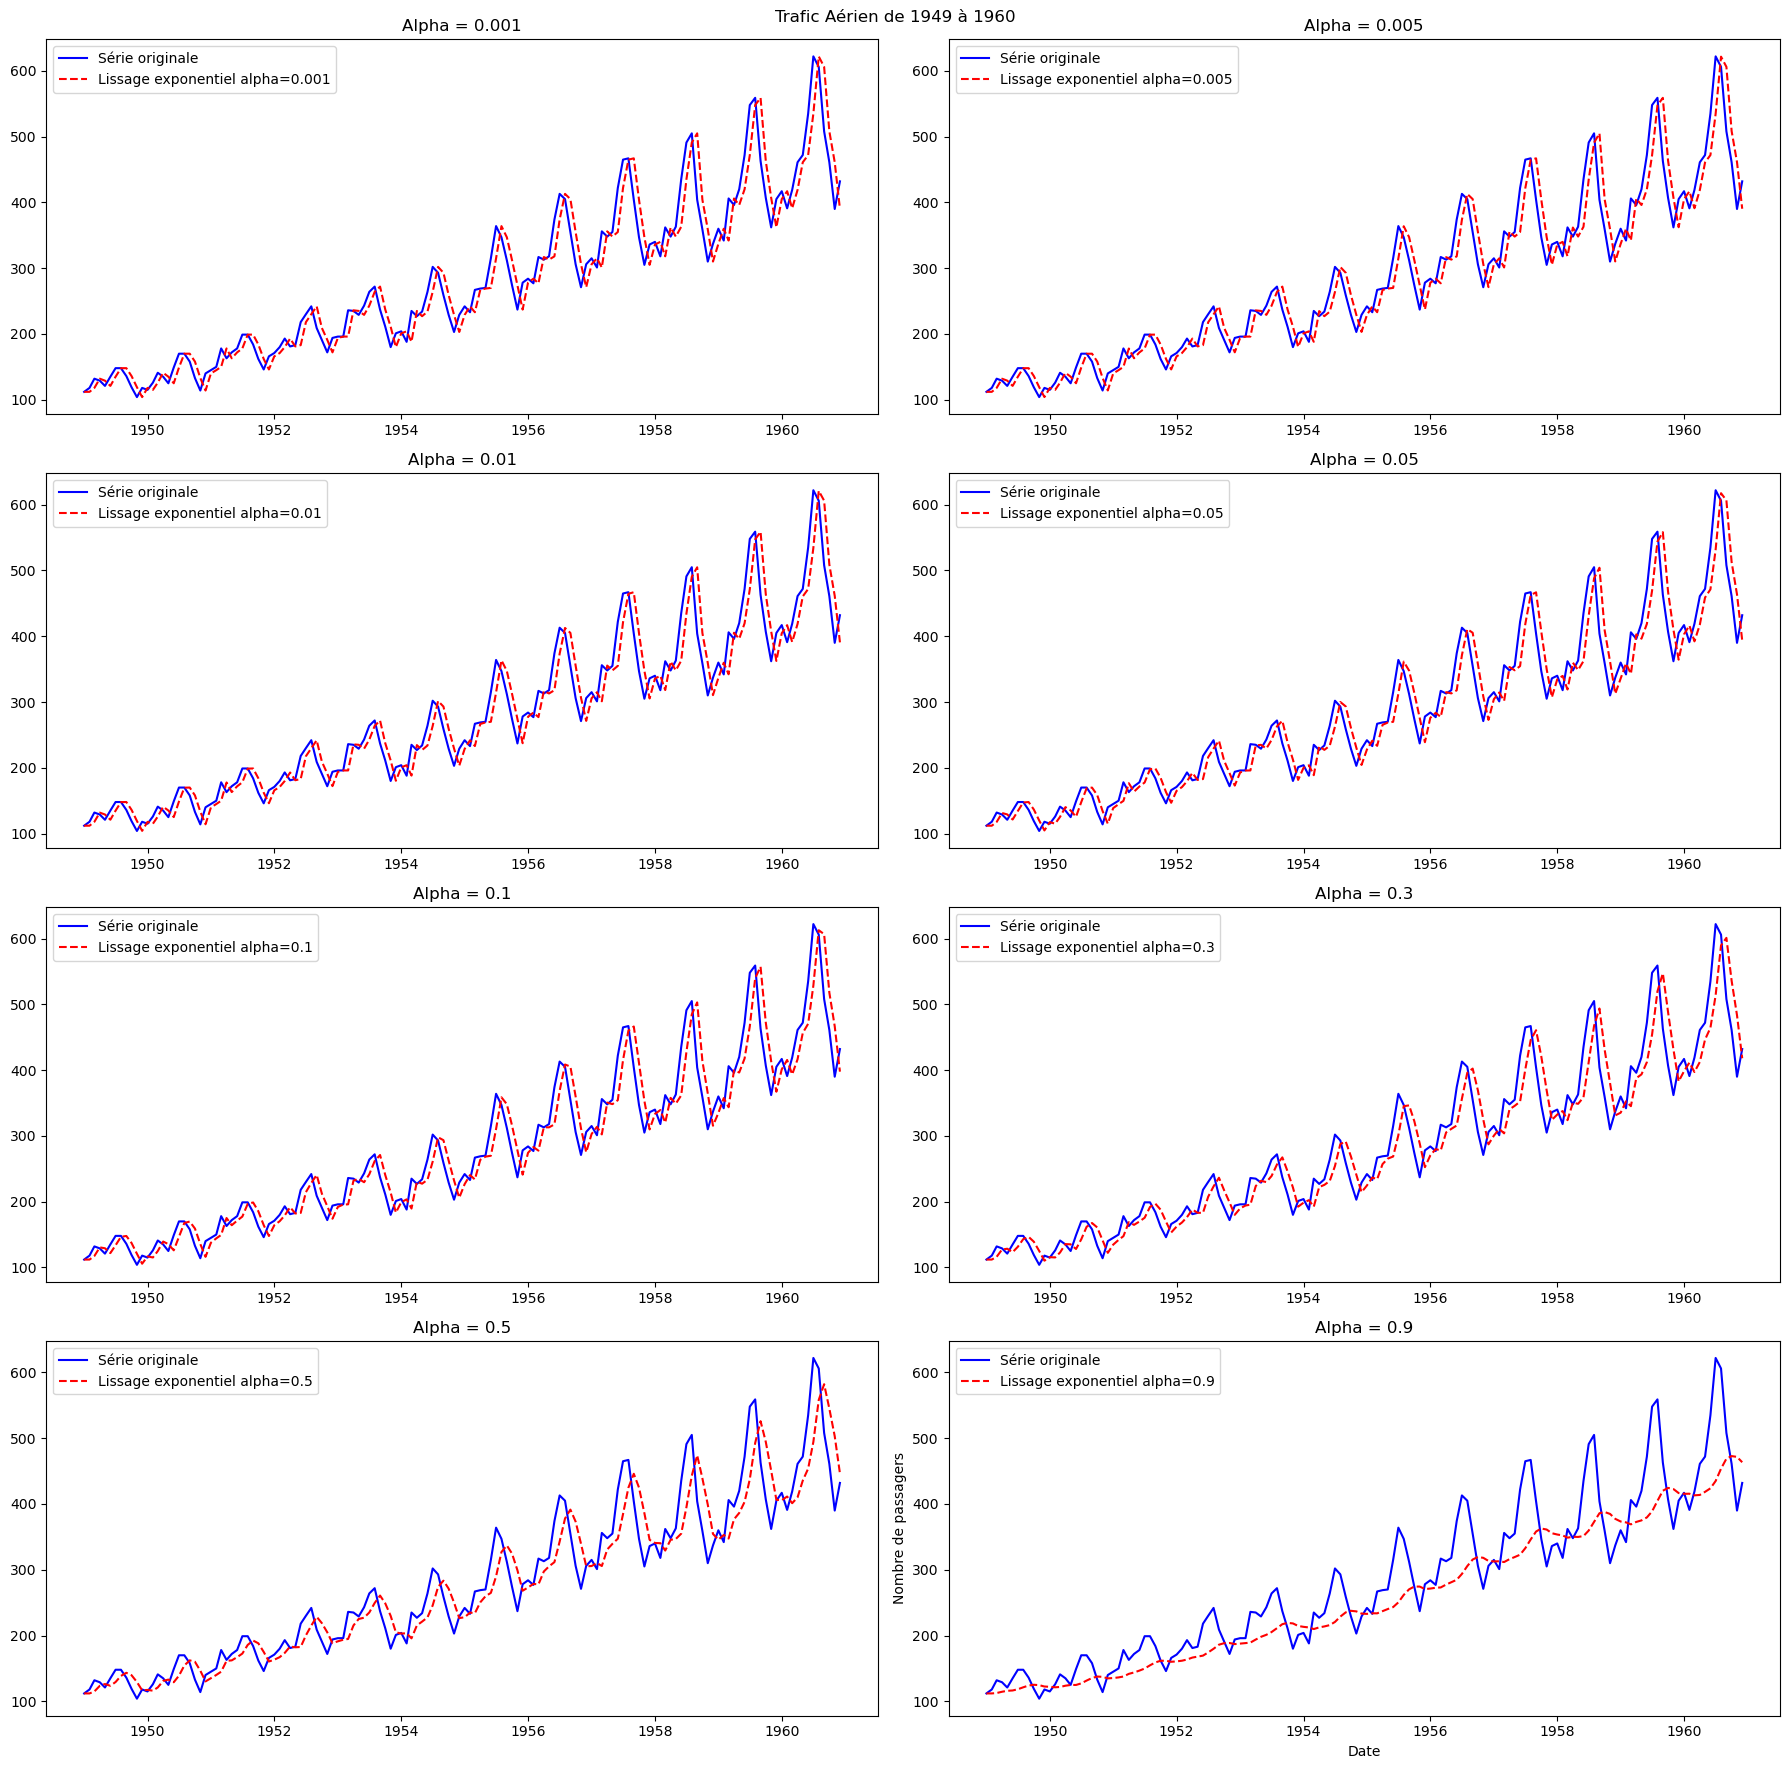

In [23]:
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.9]
serie_copie = serie.copy()  
fig, axs = plt.subplots(4, 2, figsize=(18, 18))  

for i, alpha in enumerate(alphas):
    row = i // 2
    col = i % 2
    
    
    
    prevision = [0] * len(serie)
    prevision[0] = serie['passagers'][0]
    
    for j in range(1, len(serie)):
        prevision[j] = (1 - alpha) * serie['passagers'][j-1] + alpha * prevision[j-1]
    
    df_prevision = pd.DataFrame(prevision, index=serie.index, columns=['Prevision'])
    
     # Calculer l'erreur au sens de moindre carré
    erreur_mc = np.square(serie['passagers'] - df_prevision['Prevision'])
    
    # Ajouter la colonne de prévision à la série copiée
    serie_copie[f'Prevision_alpha_{alpha}'] = df_prevision
    serie_copie[f'Erreur_alpha_{alpha}'] = erreur_mc
    
    # Afficher la série temporelle originale
    axs[row, col].plot(serie['passagers'], label='Série originale', color='b')
    
    # Afficher la prévision avec le lissage exponentiel simple
    axs[row, col].plot(df_prevision, label=f'Lissage exponentiel alpha={alpha}', color='r', linestyle='--')
    axs[row, col].set_title(f'Alpha = {alpha}')
    
    axs[row, col].legend()

plt.xlabel('Date')
plt.ylabel('Nombre de passagers')
plt.suptitle('Trafic Aérien de 1949 à 1960')
plt.tight_layout()
plt.show()

In [22]:
serie_copie.head(3)

,passagers,Prevision_alpha_0.001,Erreur_alpha_0.001,Prevision_alpha_0.005,Erreur_alpha_0.005,Prevision_alpha_0.01,Erreur_alpha_0.01,Prevision_alpha_0.05,Erreur_alpha_0.05,Prevision_alpha_0.1,Erreur_alpha_0.1,Prevision_alpha_0.3,Erreur_alpha_0.3,Prevision_alpha_0.5,Erreur_alpha_0.5,Prevision_alpha_0.9,Erreur_alpha_0.9
Month,,,,,,,,,,,,,,,,,
1949-01-01,112,112.000,0.000000,112.00,0.0000,112.00,0.0000,112.0,0.00,112.0,0.00,112.0,0.00,112.0,0.0,112.0,0.00
1949-02-01,118,112.000,36.000000,112.00,36.0000,112.00,36.0000,112.0,36.00,112.0,36.00,112.0,36.00,112.0,36.0,112.0,36.00
1949-03-01,132,117.994,196.168036,117.97,196.8409,117.94,197.6836,117.7,204.49,117.4,213.16,116.2,249.64,115.0,289.0,112.6,376.36


In [17]:
# Calculer la somme des erreurs au sens de moindre carré pour chaque alpha
somme_erreurs = serie_copie.filter(like='Erreur_alpha').sum()

# Trouver l'alpha correspondant à la plus petite somme d'erreurs
meilleur_alpha = somme_erreurs.idxmin().split('_')[-1]

# Afficher la somme des erreurs pour chaque alpha
print(somme_erreurs)

# Afficher l'alpha correspondant à la meilleure approximation
print(f"Meilleure approximation avec alpha={meilleur_alpha}")

# Conclure que cet alpha donne la meilleure approximation
print("L'alpha donnant la meilleure approximation est celui avec la plus petite somme d'erreurs au sens de moindre carré.")

Erreur_alpha_0.001    162603.353209
Erreur_alpha_0.005    163003.353126
Erreur_alpha_0.01     163509.187175
Erreur_alpha_0.05     167791.962907
Erreur_alpha_0.1      173750.364512
Erreur_alpha_0.3      204926.779921
Erreur_alpha_0.5      249095.697482
Erreur_alpha_0.9      393640.056494
dtype: float64
Meilleure approximation avec alpha=0.001
L'alpha donnant la meilleure approximation est celui avec la plus petite somme d'erreurs au sens de moindre carré.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
demo=pd.read_csv("demographie_usa\POP.csv",index_col=2,parse_dates=[2])
demo.drop(['realtime_start','realtime_end'],inplace=True,axis=1)

In [6]:
demo.rename(columns={"value":"population"},inplace=True)

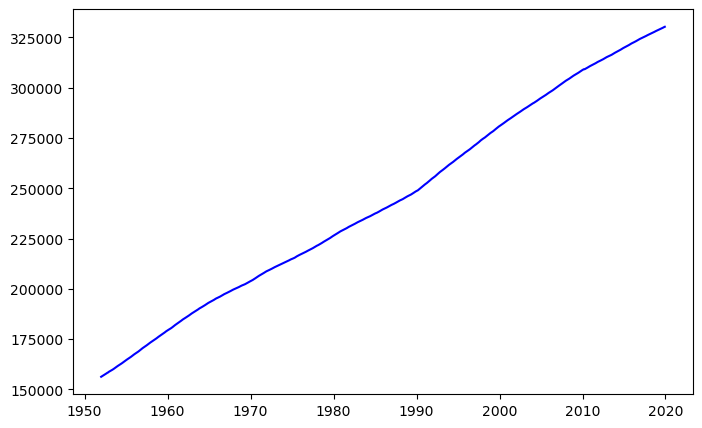

In [8]:
plt.figure(figsize=(8,5))
plt.plot(demo,color='b')

## Calcul de la meilleur aproximation et les erreurs

In [13]:
# Liste des valeurs de alpha à tester
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.9]
n = len(demo)
results = []

for alpha in alphas:
    somme = 0
    erreur = 0
    for j in range(1, len(demo)):
        somme += alpha * demo['population'][n - j]
        a_n = ((1 - alpha) / (1 - alpha ** n)) * somme
        erreur += (alpha**j) * (demo['population'][n - j]-a_n)**2
    results.append({'alpha': alpha, 'a_chapeau': a_n, 'erreur': erreur})

df = pd.DataFrame(results)
print(df)

   alpha     a_chapeau        erreur
0  0.001  1.986246e+05  1.089955e+08
1  0.005  9.891468e+05  5.427932e+08
2  0.010  1.968352e+06  1.080127e+09
3  0.050  9.444115e+06  5.182945e+09
4  0.100  1.789411e+07  9.830621e+09
5  0.300  4.175293e+07  2.416859e+10
6  0.500  4.970587e+07  4.090163e+10
7  0.900  1.789411e+07  7.197329e+11


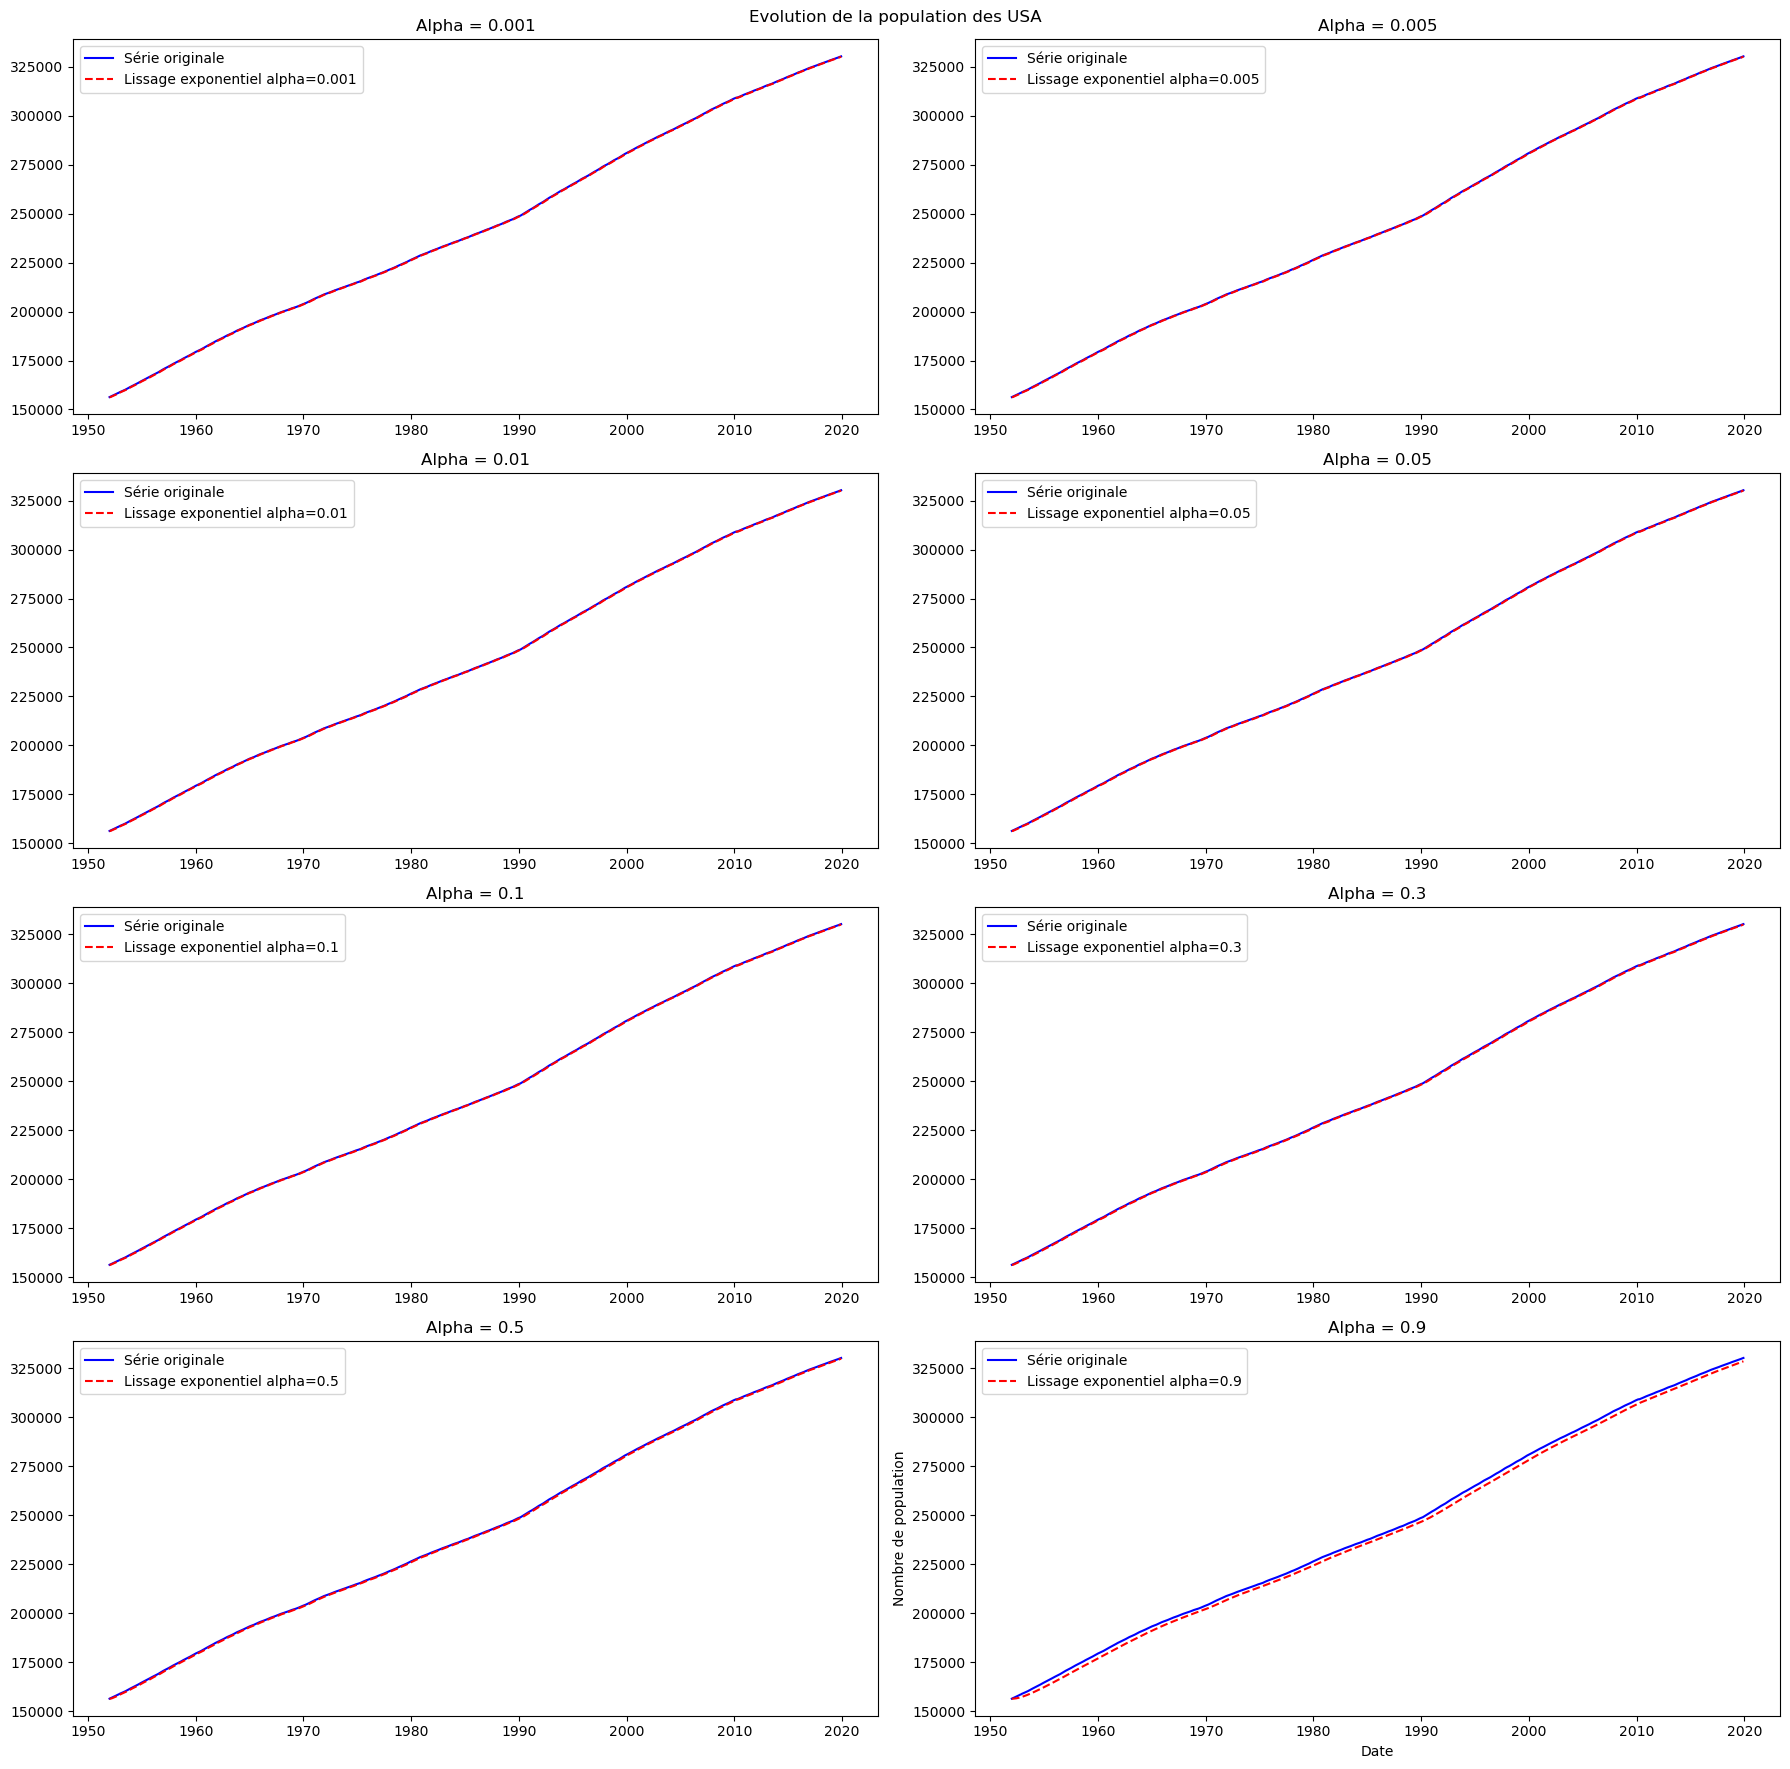

In [14]:
# Liste des valeurs de alpha à tester
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.9]
demo_copie = demo.copy()  # Créer une copie indépendante de la série
fig, axs = plt.subplots(4, 2, figsize=(18, 18))  # 4 lignes et 2 colonnes pour afficher 2 figures par ligne

for i, alpha in enumerate(alphas):
    row = i // 2
    col = i % 2
    
    
    
    prevision = [0] * len(demo)
    prevision[0] = demo['population'][0]
    
    for j in range(1, len(demo)):
        prevision[j] = (1 - alpha) * demo['population'][j-1] + alpha * prevision[j-1]
    
    df_prevision = pd.DataFrame(prevision, index=demo.index, columns=['Prevision'])
    
     # Calculer l'erreur au sens de moindre carré
    erreur_mc = np.square(demo['population'] - df_prevision['Prevision'])
    
    # Ajouter la colonne de prévision à la série copiée
    demo_copie[f'Prevision_alpha_{alpha}'] = df_prevision
    demo_copie[f'Erreur_alpha_{alpha}'] = erreur_mc
    
    # Afficher la série temporelle originale
    axs[row, col].plot(demo['population'], label='Série originale', color='b')
    
    # Afficher la prévision avec le lissage exponentiel simple
    axs[row, col].plot(df_prevision, label=f'Lissage exponentiel alpha={alpha}', color='r', linestyle='--')
    axs[row, col].set_title(f'Alpha = {alpha}')
    
    axs[row, col].legend()

plt.xlabel('Date')
plt.ylabel('Nombre de population')
plt.suptitle('Evolution de la population des USA')
plt.tight_layout()
plt.show()

In [15]:
demo_copie.head(3)

,population,Prevision_alpha_0.001,Erreur_alpha_0.001,Prevision_alpha_0.005,Erreur_alpha_0.005,Prevision_alpha_0.01,Erreur_alpha_0.01,Prevision_alpha_0.05,Erreur_alpha_0.05,Prevision_alpha_0.1,Erreur_alpha_0.1,Prevision_alpha_0.3,Erreur_alpha_0.3,Prevision_alpha_0.5,Erreur_alpha_0.5,Prevision_alpha_0.9,Erreur_alpha_0.9
date,,,,,,,,,,,,,,,,,
1952-01-01,156309.0,156309.000,0.000000,156309.00,0.0000,156309.00,0.0000,156309.0,0.00,156309.0,0.00,156309.0,0.00,156309.0,0.0,156309.0,0.00
1952-02-01,156527.0,156309.000,47524.000000,156309.00,47524.0000,156309.00,47524.0000,156309.0,47524.00,156309.0,47524.00,156309.0,47524.00,156309.0,47524.0,156309.0,47524.00
1952-03-01,156731.0,156526.782,41704.991524,156525.91,42061.9081,156524.82,42510.1924,156516.1,46182.01,156505.2,50985.64,156461.6,72576.36,156418.0,97969.0,156330.8,160160.04


In [11]:
# Calculer la somme des erreurs au sens de moindre carré pour chaque alpha
somme_erreurs = demo_copie.filter(like='Erreur_alpha').sum()

# Trouver l'alpha correspondant à la plus petite somme d'erreurs
meilleur_alpha = somme_erreurs.idxmin().split('_')[-1]

# Afficher la somme des erreurs pour chaque alpha
print(somme_erreurs)

# Afficher l'alpha correspondant à la meilleure approximation
print(f"Meilleure approximation avec alpha={meilleur_alpha}")

# Conclure que cet alpha donne la meilleure approximation
print("L'alpha donnant la meilleure approximation est celui avec la plus petite somme d'erreurs au sens de moindre carré.")

Erreur_alpha_0.001    3.879491e+07
Erreur_alpha_0.005    3.910548e+07
Erreur_alpha_0.01     3.949900e+07
Erreur_alpha_0.05     4.287373e+07
Erreur_alpha_0.1      4.773964e+07
Erreur_alpha_0.3      7.869468e+07
Erreur_alpha_0.5      1.536253e+08
Erreur_alpha_0.9      3.759931e+09
dtype: float64
Meilleure approximation avec alpha=0.001
L'alpha donnant la meilleure approximation est celui avec la plus petite somme d'erreurs au sens de moindre carré.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
bourse=pd.read_csv("bourse_nationnale/infy_stock.csv",index_col=0,parse_dates=[0])
bourse.drop(['Symbol','Series','Prev Close','Last','Open','High','Low','VWAP','Volume','Turnover','%Deliverble','Trades','Deliverable Volume'],inplace=True,axis=1)

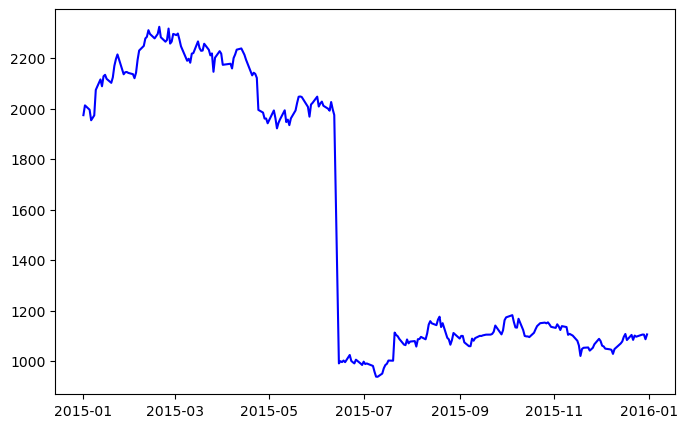

In [20]:
plt.figure(figsize=(8,5))
plt.plot(bourse,color='b')

## Calcul de la meilleur aproximation et les erreurs

In [25]:
# Liste des valeurs de alpha à tester
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.9]
n = len(bourse)
results = []

for alpha in alphas:
    somme = 0
    erreur = 0
    for j in range(1, len(bourse)):
        somme += alpha * bourse['Close'][n - j]
        a_n = ((1 - alpha) / (1 - alpha ** n)) * somme
        erreur += (alpha**j) * (bourse['Close'][n - j]-a_n)**2
    results.append({'alpha': alpha, 'a_chapeau': a_n, 'erreur': erreur})

df = pd.DataFrame(results)
print(df)

   alpha     a_chapeau        erreur
0  0.001    381.542276  1.220646e+03
1  0.005   1900.072895  6.077968e+03
2  0.010   3781.049580  1.209285e+04
3  0.050  18141.399500  5.795861e+04
4  0.100  34373.178000  1.097974e+05
5  0.300  80204.082000  2.691075e+05
6  0.500  95481.050000  4.544698e+05
7  0.900  34373.178000  7.880141e+06


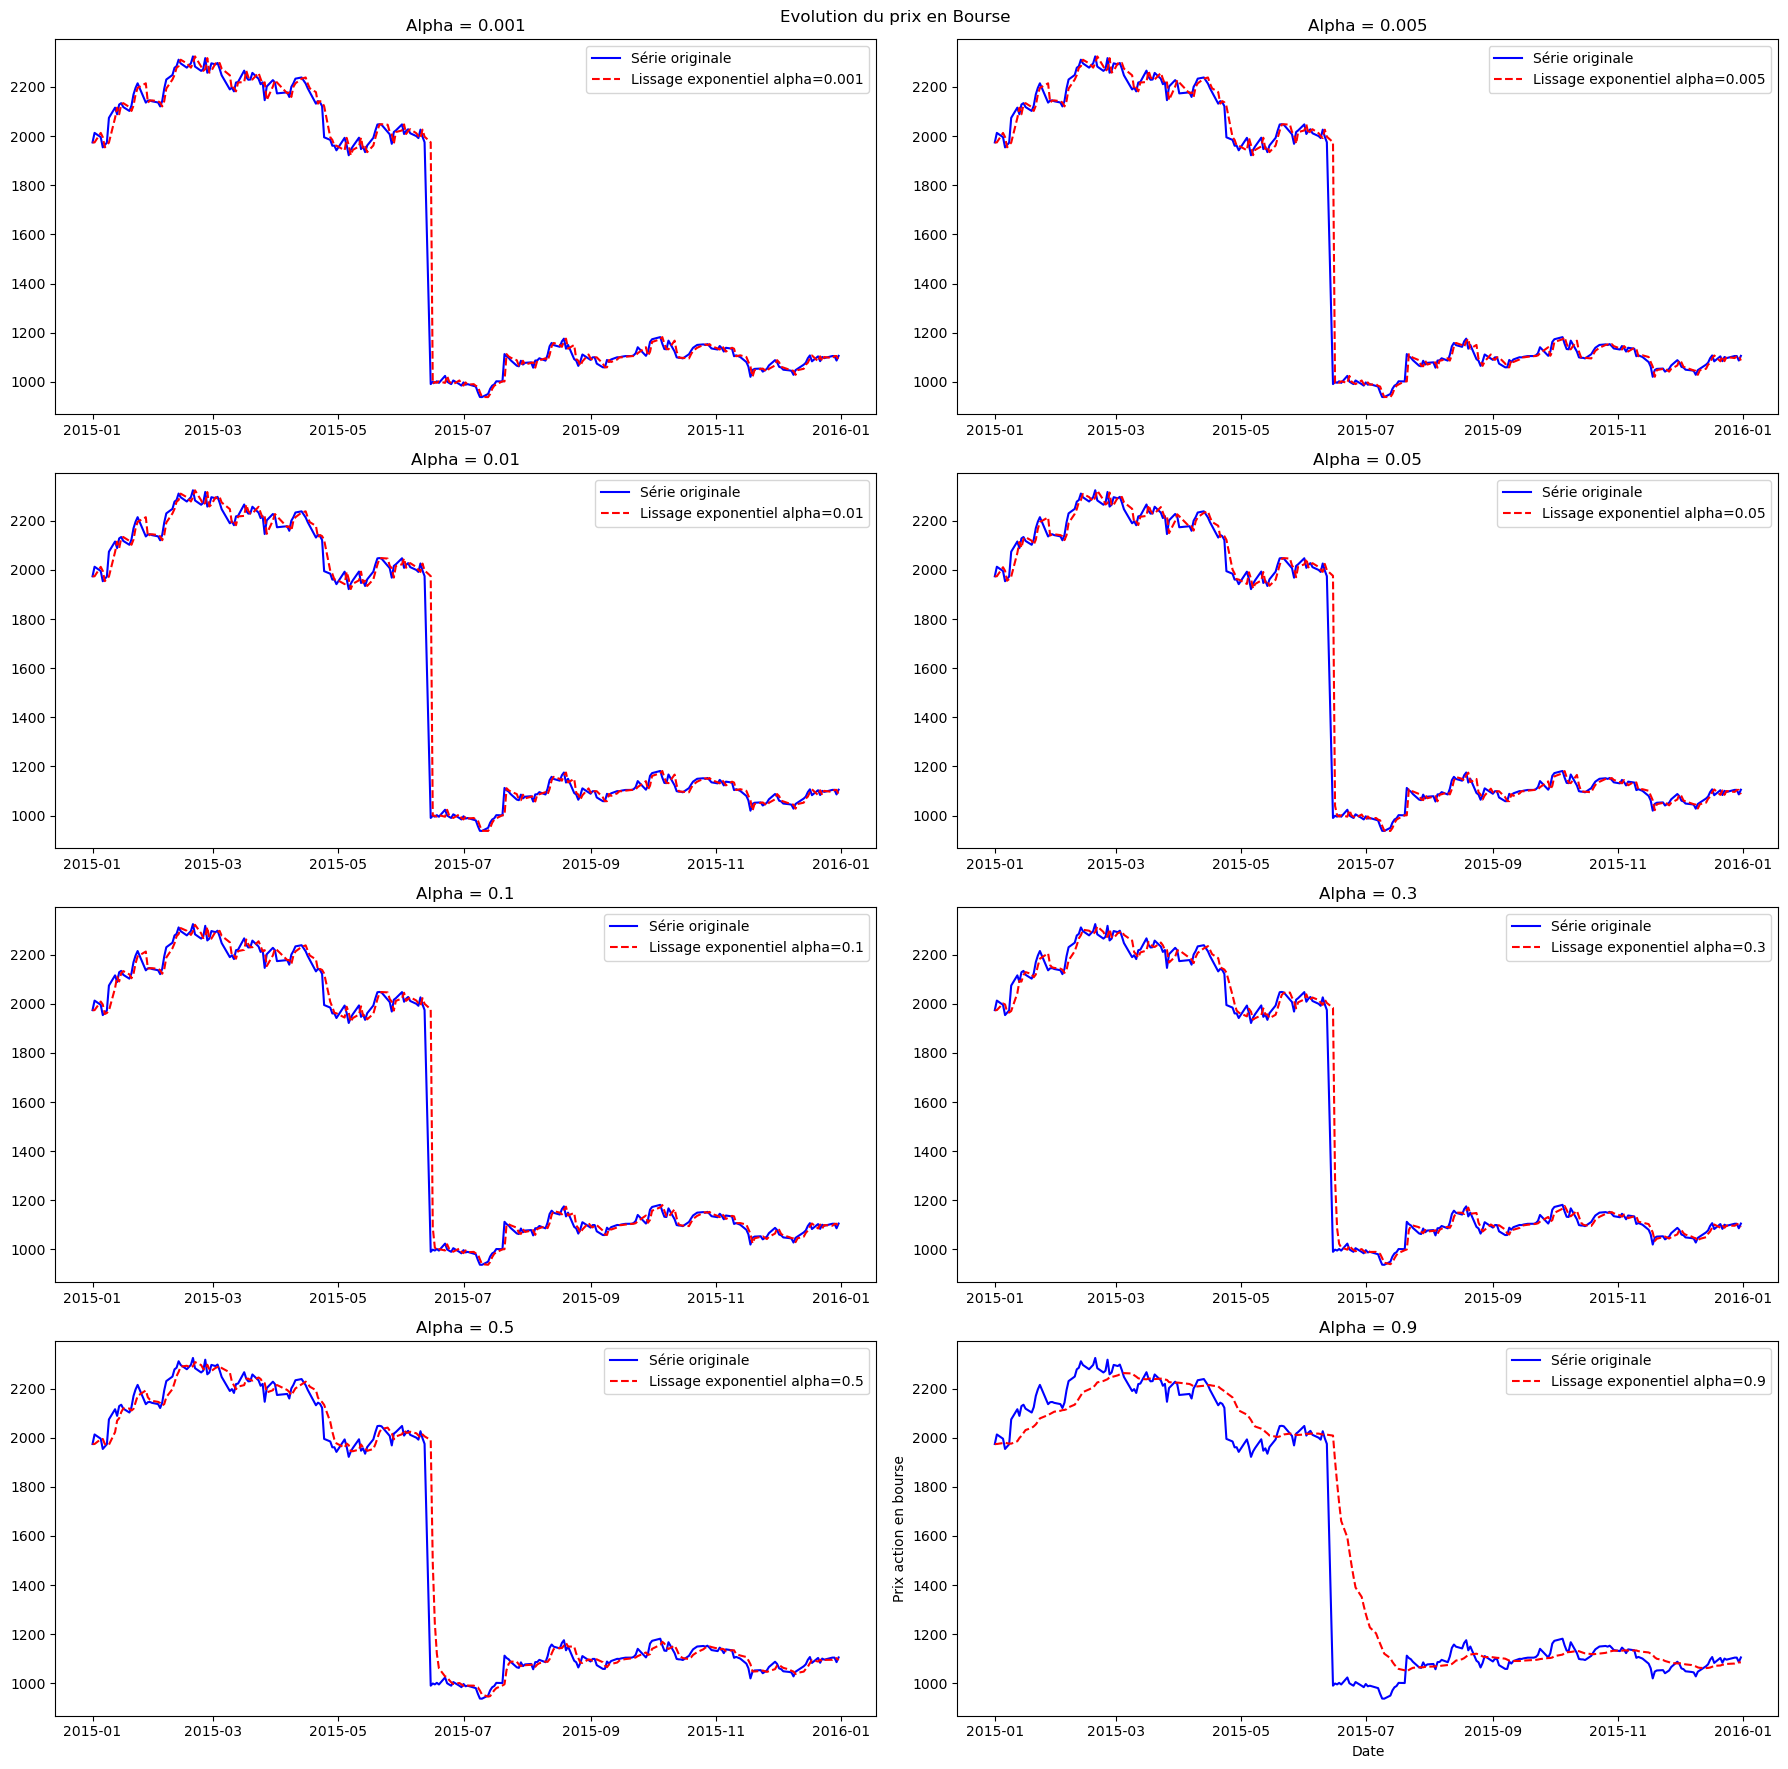

In [27]:
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.9]
bourse_copie = bourse.copy()  
fig, axs = plt.subplots(4, 2, figsize=(18, 18))  

for i, alpha in enumerate(alphas):
    row = i // 2
    col = i % 2
    
    
    
    prevision = [0] * len(bourse)
    prevision[0] = bourse['Close'][0]
    
    for j in range(1, len(bourse)):
        prevision[j] = (1 - alpha) * bourse['Close'][j-1] + alpha * prevision[j-1]
    
    df_prevision = pd.DataFrame(prevision, index=bourse.index, columns=['Prevision'])
    
     # Calculer l'erreur au sens de moindre carré
    erreur_mc = np.square(bourse['Close'] - df_prevision['Prevision'])
    
    # Ajouter la colonne de prévision à la série copiée
    bourse_copie[f'Prevision_alpha_{alpha}'] = df_prevision
    bourse_copie[f'Erreur_alpha_{alpha}'] = erreur_mc
    
    # Afficher la série temporelle originale
    axs[row, col].plot(bourse['Close'], label='Série originale', color='b')
    
    # Afficher la prévision avec le lissage exponentiel simple
    axs[row, col].plot(df_prevision, label=f'Lissage exponentiel alpha={alpha}', color='r', linestyle='--')
    axs[row, col].set_title(f'Alpha = {alpha}')
    
    axs[row, col].legend()

plt.xlabel('Date')
plt.ylabel('Prix action en bourse')
plt.suptitle('Evolution du prix en Bourse')
plt.tight_layout()
plt.show()

In [26]:
bourse_copie.head(3)

,Close,Prevision_alpha_0.001,Erreur_alpha_0.001,Prevision_alpha_0.005,Erreur_alpha_0.005,Prevision_alpha_0.01,Erreur_alpha_0.01,Prevision_alpha_0.05,Erreur_alpha_0.05,Prevision_alpha_0.1,Erreur_alpha_0.1,Prevision_alpha_0.3,Erreur_alpha_0.3,Prevision_alpha_0.5,Erreur_alpha_0.5,Prevision_alpha_0.9,Erreur_alpha_0.9
Date,,,,,,,,,,,,,,,,,
2015-01-01,1974.4,1974.4000,0.000000,1974.400,0.000000,1974.400,0.000000,1974.40,0.0000,1974.40,0.0000,1974.40,0.0000,1974.4,0.00,1974.40,0.0000
2015-01-02,2013.2,1974.4000,1505.440000,1974.400,1505.440000,1974.400,1505.440000,1974.40,1505.4400,1974.40,1505.4400,1974.40,1505.4400,1974.4,1505.44,1974.40,1505.4400
2015-01-05,1995.9,2013.1612,297.949025,2013.006,292.615236,2012.812,286.015744,2011.26,235.9296,2009.32,180.0964,2001.56,32.0356,1993.8,4.41,1978.28,310.4644


In [23]:
# Calculer la somme des erreurs au sens de moindre carré pour chaque alpha
somme_erreurs = bourse_copie.filter(like='Erreur_alpha').sum()

# Trouver l'alpha correspondant à la plus petite somme d'erreurs
meilleur_alpha = somme_erreurs.idxmin().split('_')[-1]

# Afficher la somme des erreurs pour chaque alpha
print(somme_erreurs)

# Afficher l'alpha correspondant à la meilleure approximation
print(f"Meilleure approximation avec alpha={meilleur_alpha}")

# Conclure que cet alpha donne la meilleure approximation
print("L'alpha donnant la meilleure approximation est celui avec la plus petite somme d'erreurs au sens de moindre carré.")

Erreur_alpha_0.001    1.135779e+06
Erreur_alpha_0.005    1.135901e+06
Erreur_alpha_0.01     1.136108e+06
Erreur_alpha_0.05     1.139918e+06
Erreur_alpha_0.1      1.150122e+06
Erreur_alpha_0.3      1.259094e+06
Erreur_alpha_0.5      1.536240e+06
Erreur_alpha_0.9      6.125907e+06
dtype: float64
Meilleure approximation avec alpha=0.001
L'alpha donnant la meilleure approximation est celui avec la plus petite somme d'erreurs au sens de moindre carré.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
climat=pd.read_csv("temperature_ambiante/MLTempDataset.csv",index_col=3,parse_dates=[3])
climat.drop(['Unnamed: 0','Datetime1'],inplace=True,axis=1)

In [3]:
climat.rename(columns={"DAYTON_MW":"temperature"},inplace=True)

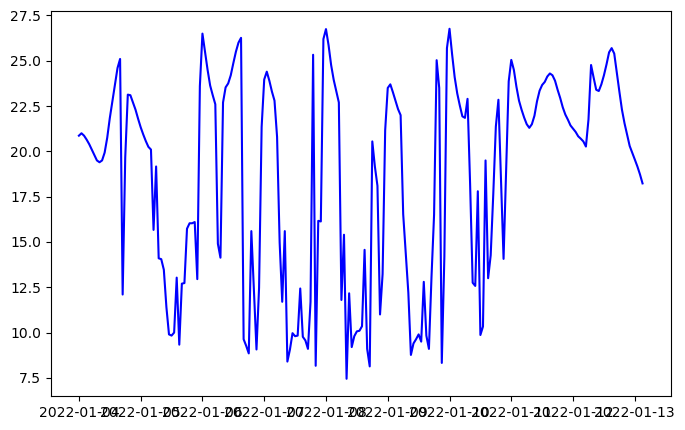

In [4]:
climat=climat[:220]
plt.figure(figsize=(8,5))
plt.plot(climat,color='b')

## Calcul de la meilleur aproximation et les erreurs

In [5]:
# Liste des valeurs de alpha à tester
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.9]
n = len(climat)
results = []

for alpha in alphas:
    somme = 0
    erreur = 0
    for j in range(1, len(climat)):
        somme += alpha * climat['temperature'][n - j]
        a_n = ((1 - alpha) / (1 - alpha ** n)) * somme
        erreur += (alpha**j) * (climat['temperature'][n - j]-a_n)**2
    results.append({'alpha': alpha, 'a_chapeau': a_n, 'erreur': erreur})

df = pd.DataFrame(results)
print(df)

   alpha    a_chapeau       erreur
0  0.001     4.081691     0.332128
1  0.005    20.326741     1.654360
2  0.010    40.449192     3.293010
3  0.050   194.074407    15.836776
4  0.100   367.719930    30.119862
5  0.300   858.013170    74.695651
6  0.500  1021.444250   126.959135
7  0.900   367.719930  3008.844182


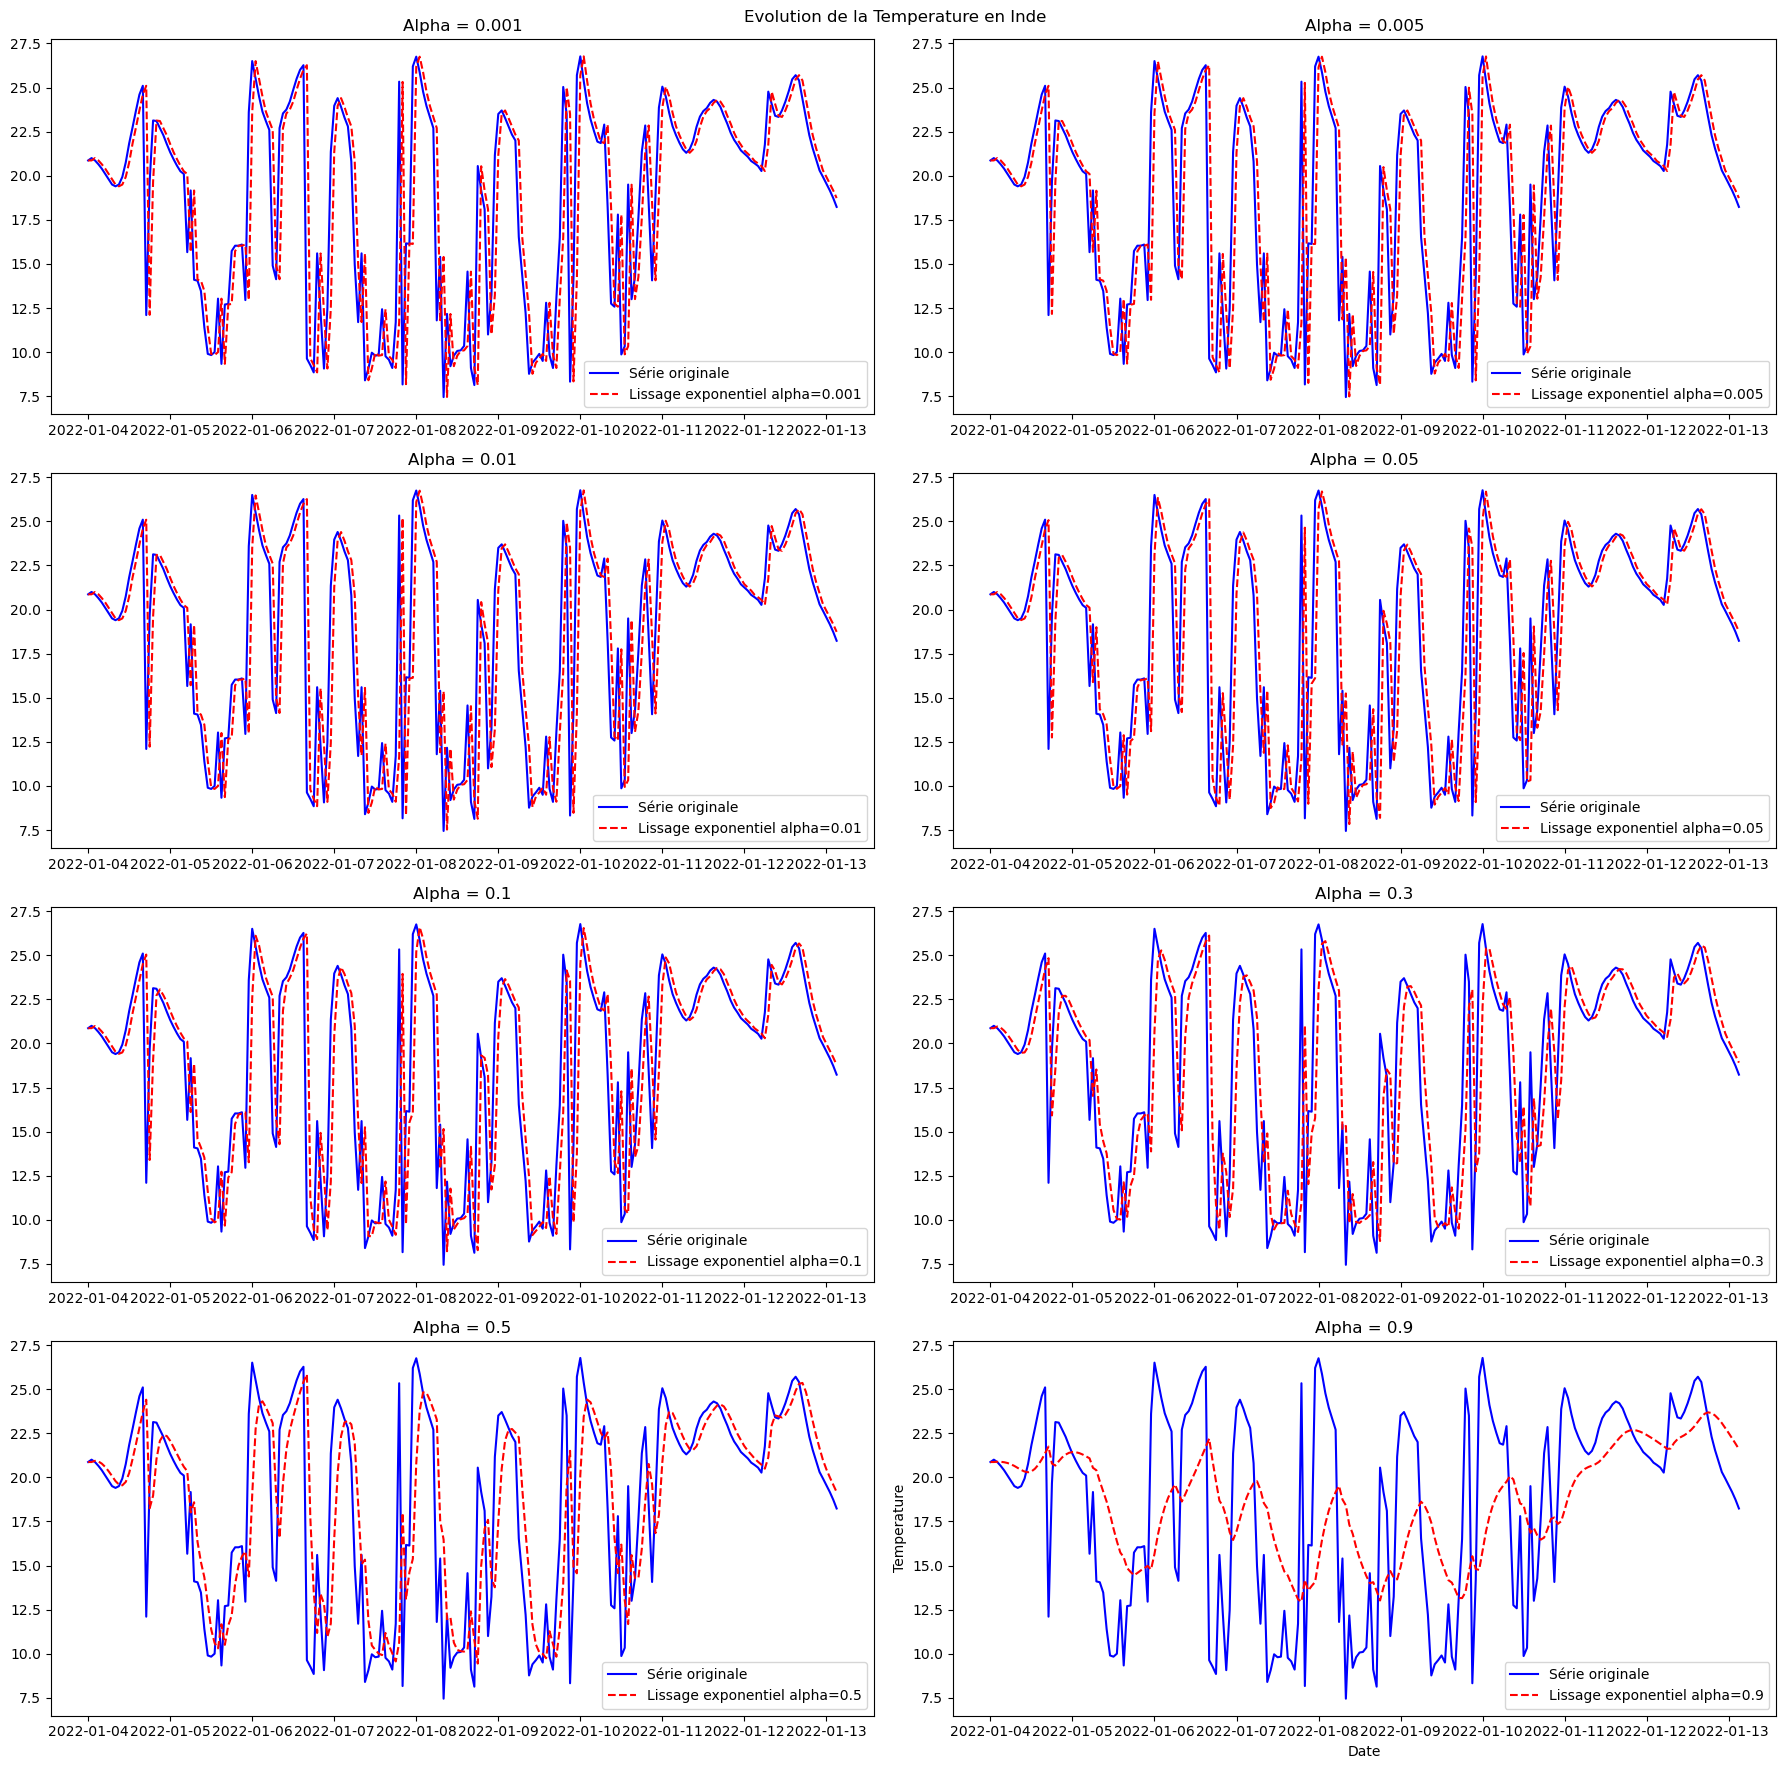

In [10]:
alphas = [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.9]
climat_copie = climat.copy()  
fig, axs = plt.subplots(4, 2, figsize=(18, 18))  

for i, alpha in enumerate(alphas):
    row = i // 2
    col = i % 2
    
    
    
    prevision = [0] * len(climat)
    prevision[0] = climat['temperature'][0]
    
    for j in range(1, len(climat)):
        prevision[j] = (1 - alpha) * climat['temperature'][j-1] + alpha * prevision[j-1]
    
    df_prevision = pd.DataFrame(prevision, index=climat.index, columns=['Prevision'])
    
     # Calculer l'erreur au sens de moindre carré
    erreur_mc = np.square(climat['temperature'] - df_prevision['Prevision'])
    
    # Ajouter la colonne de prévision à la série copiée
    climat_copie[f'Prevision_alpha_{alpha}'] = df_prevision
    climat_copie[f'Erreur_alpha_{alpha}'] = erreur_mc
    
    # Afficher la série temporelle originale
    axs[row, col].plot(climat['temperature'], label='Série originale', color='b')
    
    # Afficher la prévision avec le lissage exponentiel simple
    axs[row, col].plot(df_prevision, label=f'Lissage exponentiel alpha={alpha}', color='r', linestyle='--')
    axs[row, col].set_title(f'Alpha = {alpha}')
    
    axs[row, col].legend()

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.suptitle('Evolution de la Temperature en Inde')
plt.tight_layout()
plt.show()

In [7]:
climat_copie.head(3)

,temperature,Prevision_alpha_0.001,Erreur_alpha_0.001,Prevision_alpha_0.005,Erreur_alpha_0.005,Prevision_alpha_0.01,Erreur_alpha_0.01,Prevision_alpha_0.05,Erreur_alpha_0.05,Prevision_alpha_0.1,Erreur_alpha_0.1,Prevision_alpha_0.3,Erreur_alpha_0.3,Prevision_alpha_0.5,Erreur_alpha_0.5,Prevision_alpha_0.9,Erreur_alpha_0.9
Datetime,,,,,,,,,,,,,,,,,
2022-01-04 00:00:00,20.867,20.867000,0.000000,20.867000,0.000000,20.86700,0.000000,20.86700,0.000000,20.8670,0.000000,20.8670,0.000000,20.8670,0.000000,20.8670,0.000000
2022-01-04 01:00:00,21.000,20.867000,0.017689,20.867000,0.017689,20.86700,0.017689,20.86700,0.017689,20.8670,0.017689,20.8670,0.017689,20.8670,0.017689,20.8670,0.017689
2022-01-04 02:00:00,20.867,20.999867,0.017654,20.999335,0.017513,20.99867,0.017337,20.99335,0.015964,20.9867,0.014328,20.9601,0.008668,20.9335,0.004422,20.8803,0.000177


In [8]:
# Calculer la somme des erreurs au sens de moindre carré pour chaque alpha
somme_erreurs = climat_copie.filter(like='Erreur_alpha').sum()

# Trouver l'alpha correspondant à la plus petite somme d'erreurs
meilleur_alpha = somme_erreurs.idxmin().split('_')[-1]

# Afficher la somme des erreurs pour chaque alpha
print(somme_erreurs)

# Afficher l'alpha correspondant à la meilleure approximation
print(f"Meilleure approximation avec alpha={meilleur_alpha}")

# Conclure que cet alpha donne la meilleure approximation
print("L'alpha donnant la meilleure approximation est celui avec la plus petite somme d'erreurs au sens de moindre carré.")

Erreur_alpha_0.001    3397.605058
Erreur_alpha_0.005    3393.378800
Erreur_alpha_0.01     3388.207652
Erreur_alpha_0.05     3351.165544
Erreur_alpha_0.1      3315.130770
Erreur_alpha_0.3      3279.582625
Erreur_alpha_0.5      3468.058280
Erreur_alpha_0.9      5504.616797
dtype: float64
Meilleure approximation avec alpha=0.3
L'alpha donnant la meilleure approximation est celui avec la plus petite somme d'erreurs au sens de moindre carré.
